# Introduce
This kernel is a exercise of Devc Ho Chi Minh City, Vietnam, 2019 to demonstrate what we've learned for 3 first weeks.  
Members:
    - Huu V.Le
    - Bach Q. Chu
    - Hai Do

## About the data
This kernel use **Abalone Data Set** from UCI Datasets which comes from an original (non-machine learning) study:
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)  

## Abalone
'***Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae***' - Wikipedia  
- Abalone have rich nutrition and high economic value
- To optimize cost and encrease the value, determining the age of abalone is the important process
- Determining the actual age of an abalone is a bit like estimating the age of a tree, base on the rings.  
    + The ratio of rings and ages is **1**
    + Determining the age is not a simple process: People must cutting the shell then polishing and  staining and finally examine it under a microscope to count rings.

## About this kernel

- As we said, this kernel just demonstrate for:
    + Exploratory data analysis
    + Data preprocessing
    + Some visualization of data

# Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import data

In [0]:
link = 'https://raw.githubusercontent.com/hai247/dataset/master/05_abalone.csv'
data = pd.read_csv(link)

# Exploratory Data Analysis

## Data infos, descriptions

In [142]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


As we can see here we have zero null data, so we just have to check the logic of the data. Following are some of our asumptions. 
- The measurement features/attributes must not have any non-positive data.
- Gender should be M and F.

Let's take a look to see what we have here

In [144]:
print('Number of value that is not positive:')
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    print(col, (data[col] <= 0).sum())

Number of value that is not positive:
Length 0
Diameter 0
Height 2
Whole weight 0
Shucked weight 0
Viscera weight 0
Shell weight 0
Rings 0


In [145]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Check data values
### Check na, null values


In [146]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Nice, we have no na, null values in data

### Check data types

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Look at data infos and data description (meta data), we have some synthetics:**

| Feature | D_type | Unit | Description
|--|--|--|--|
| Sex |object|--| M, F, and I (infant)
| Length |float64  | mm | longest shell measurement
| Diameter | float64 | mm | perpendicular to length
| Height | float64 | mm | with meat in shell
| Whole weight | float64 | grams|	whole abalone
| Shucked weight | float64 | grams|	weight of meat
| Viscera weight | float64 | grams|	gut weight (after bleeding)
| Shell weight | float64 | grams|	after being dried
| Rings |int64|--| +1.5 gives the age in years


Yeah, they's type are seem all right!

In [148]:
cat_col = list(data.select_dtypes(include='object').columns); print('Categorical features: ',cat_col)
nor_col = list(data.select_dtypes(exclude='object').columns); print('Norminal features: ', nor_col)

Categorical features:  ['Sex']
Norminal features:  ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


### Check exception values

#### Categorical values

In [149]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Nothing wrong here, **Sex** have three unique values!
- **M**: Male
- **F**: Female
- **I**: Infant

#### Nominal values

In [150]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- Continuous type: Lenght, Diameter, ... Shell weight don't have **negative** values or anything exception  
- Integer type: Rings don't have **negative** values too!

In [151]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## Checking the Outlier of data

No handles with labels found to put in legend.


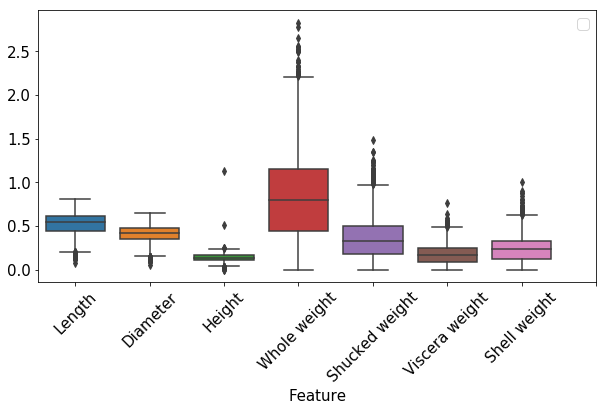

In [152]:
# f, axes = plt.subplots(1,2,figsize=(15, 4))
# data.drop(columns='Rings').boxp
plt.figure(figsize=(10,5))
sns.boxplot(data=data.drop(columns='Rings'))
y_pos = np.arange(8)
plt.xticks(y_pos, rotation = 45)
plt.xlabel('Feature')
plt.legend()

## Checking the correlation between features/attributes

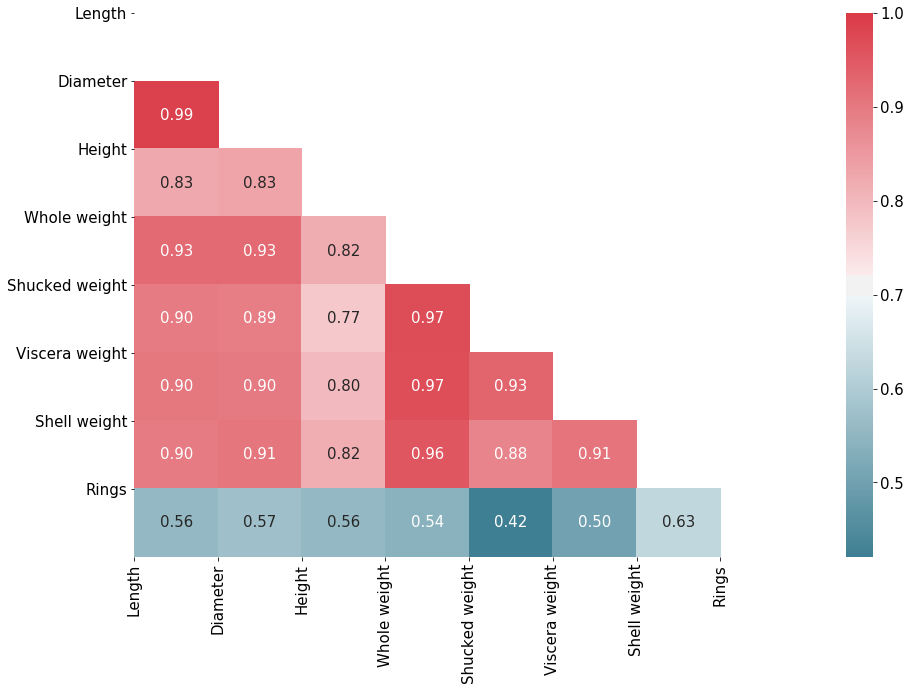

In [153]:
def heatMap(df, mirror):
   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(15, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()
heatMap(data, False)

## Check distribution

**Sex:**

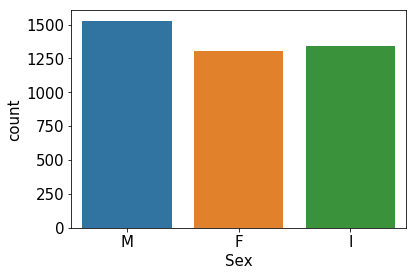

In [154]:
sns.countplot(data['Sex']);

As we saw, **Female** and **Infant** look fair, but **Male** is little more.

*Let's check norminal features*

In [155]:
print(len(nor_col))

8


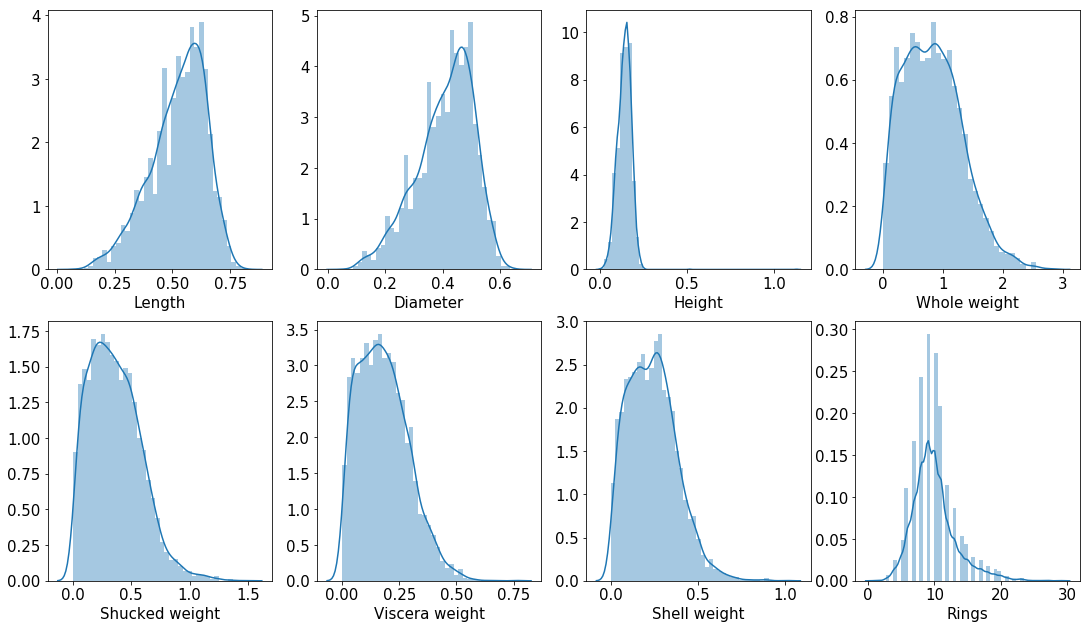

In [156]:
# data.hist(figsize=(10,10), grid = True, layout = (2,4));
f, axes = plt.subplots(2, 4)
ax_x = 0
f.set_size_inches(18.5, 10.5)
for idx, col_name in enumerate(nor_col):
    if(idx < 4):
        sns.distplot(data[col_name], ax=axes[0,idx])
    else:
        sns.distplot(data[col_name], ax=axes[1,idx-4])

Almost they look like normal distribution but have large skewness.

The distribution of Height have a very long tail although almost data look like normal.

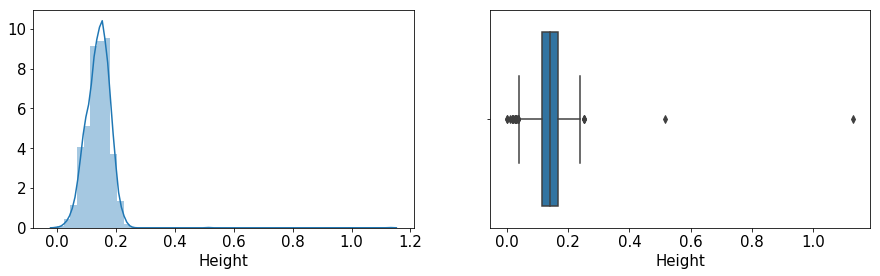

In [157]:
f, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(data['Height'], ax=axes[0]);
sns.boxplot(data['Height'], ax=axes[1]);

Hmm, may be some extreme outliers at upper bound!

In [158]:
height_des = data['Height'].describe(); height_des
height_iqr = height_des['75%'] - height_des['25%']; print('IQR: ', height_iqr)
height_lower_bound = height_des['25%'] - 1.5 * height_iqr; print('LOWER_BOUND: ', height_lower_bound)
height_upper_bound = height_des['75%'] + 1.5 * height_iqr; print('UPPER_BOUND: ', height_upper_bound)

data[data['Height'] > height_upper_bound]

IQR:  0.05
LOWER_BOUND:  0.039999999999999994
UPPER_BOUND:  0.24000000000000002


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1417,M,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,10
1428,F,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14
1763,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
2051,F,0.455,0.355,1.130,0.5940,0.3320,0.1160,0.1335,8
2179,F,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450,14


They are extreme outliers so we need to remove them.

Let's see what is the Age (Rings) of the Abelone's Infant

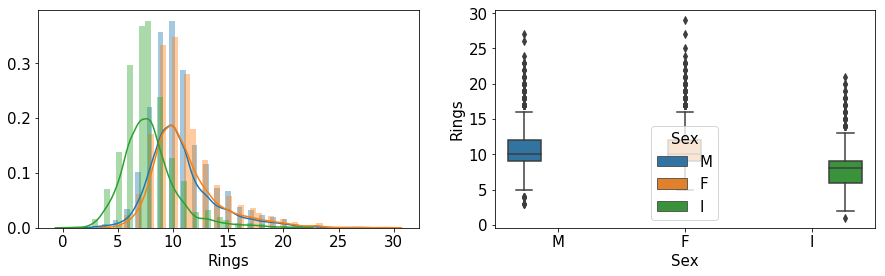

In [159]:
f, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(data[data['Sex'] == 'M']['Rings'], ax=axes[0])
sns.distplot(data[data['Sex'] == 'F']['Rings'], ax=axes[0])
sns.distplot(data[data['Sex'] == 'I']['Rings'], ax=axes[0])
sns.boxplot(x='Sex', y='Rings', hue='Sex', data=data);

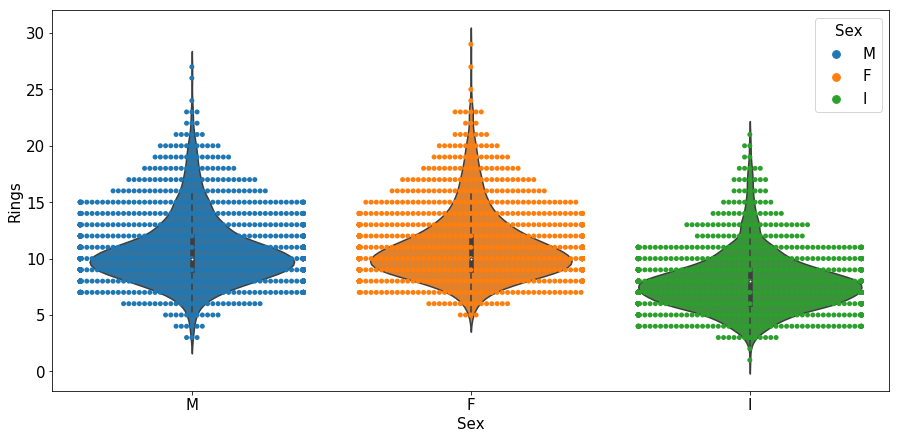

In [160]:
plt.figure(figsize=(15,7))
sns.swarmplot(x='Sex', y='Rings', hue='Sex', data=data)
sns.violinplot(x='Sex', y='Rings', data=data);

### Gender of Abalone

In [161]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

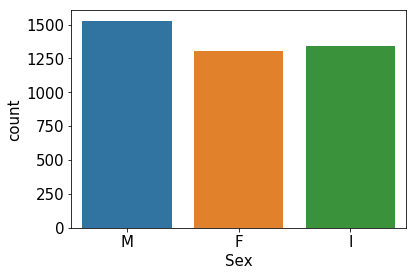

In [162]:
sns.countplot(data['Sex']);

As we can see here, from the sample data of abalone:
- The number of Male abalone is a little higher than the rest. 
- Infant abalone has no gender. Let's check how 'old' are they!

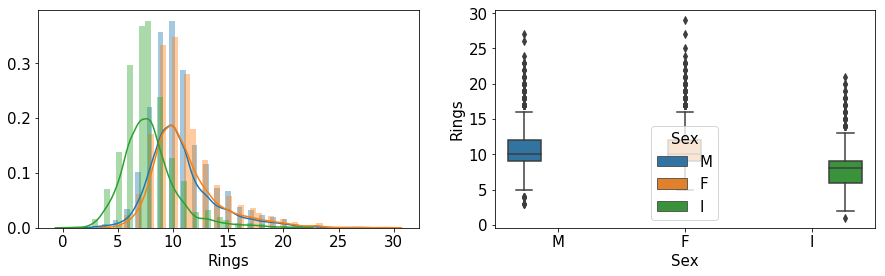

In [163]:
f, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(data[data['Sex'] == 'M']['Rings'], ax=axes[0], axlabel='M')
sns.distplot(data[data['Sex'] == 'F']['Rings'], ax=axes[0])
sns.distplot(data[data['Sex'] == 'I']['Rings'], ax=axes[0])
sns.boxplot(x='Sex', y='Rings', hue='Sex', data=data);

Though Infant abalone is a little bit younger than the Male and Female abalone, their age are still varies alot (1 to 21 years old).

Let's check if there is any factor/attribute that can be used to distiguish the Infant abalone

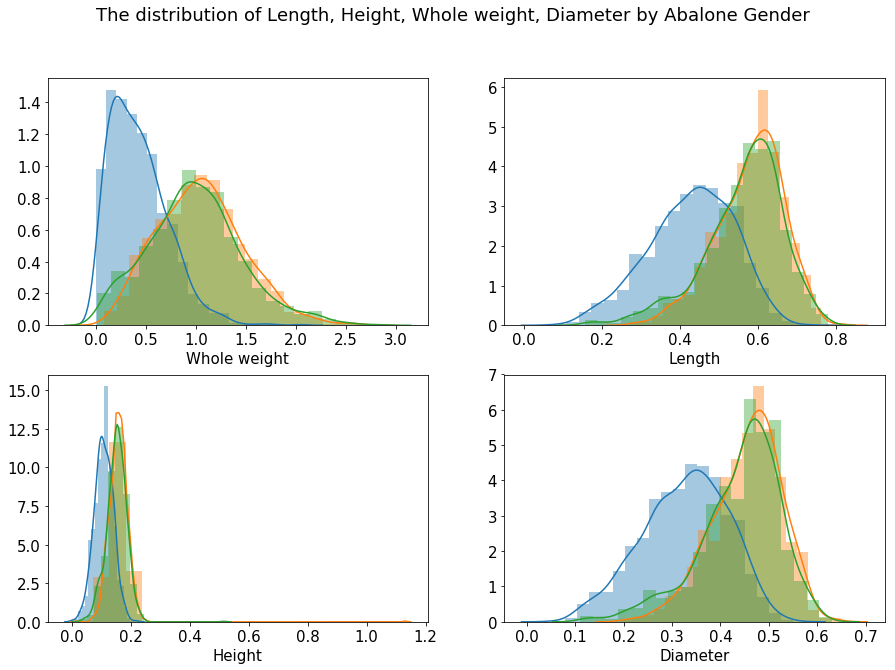

In [164]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
f.suptitle('The distribution of Length, Height, Whole weight, Diameter by Abalone Gender')
sns.distplot(data[data['Sex'] == 'I']['Length'], bins=20, ax=axes[0, 1])
sns.distplot(data[data['Sex'] == 'F']['Length'], bins=20, ax=axes[0, 1])
sns.distplot(data[data['Sex'] == 'M']['Length'], bins=20, ax=axes[0, 1])
sns.distplot(data[data['Sex'] == 'I']['Height'], bins=20, ax=axes[1, 0])
sns.distplot(data[data['Sex'] == 'F']['Height'], bins=20, ax=axes[1, 0])
sns.distplot(data[data['Sex'] == 'M']['Height'], bins=20, ax=axes[1, 0])
sns.distplot(data[data['Sex'] == 'I']['Whole weight'], bins=20, ax=axes[0, 0])
sns.distplot(data[data['Sex'] == 'F']['Whole weight'], bins=20, ax=axes[0, 0])
sns.distplot(data[data['Sex'] == 'M']['Whole weight'], bins=20, ax=axes[0, 0])
sns.distplot(data[data['Sex'] == 'I']['Diameter'], bins=20, ax=axes[1, 1])
sns.distplot(data[data['Sex'] == 'F']['Diameter'], bins=20, ax=axes[1, 1])
sns.distplot(data[data['Sex'] == 'M']['Diameter'], bins=20, ax=axes[1, 1]);

As we can see here, in general, the Infant abalone is smaller, shorter and especially lighter, while the Male and Female abalone almost share the same for all the measurements

<Figure size 720x504 with 0 Axes>

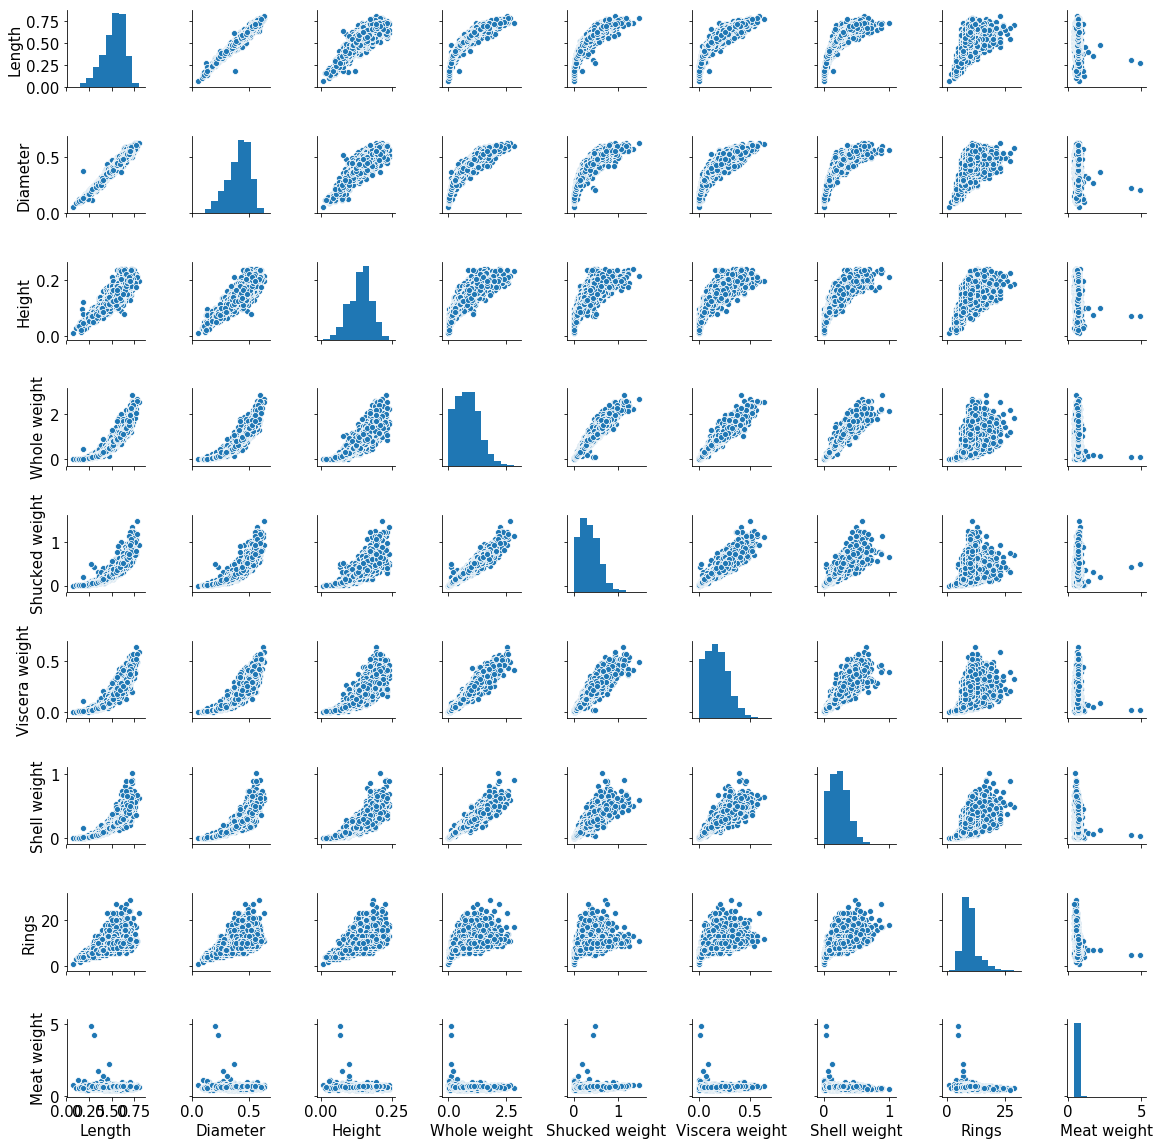

In [182]:
plt.figure(figsize=(10,7))
sns.pairplot(data,height=1.8);

- As we expected, most of the features pair are having high correlation, some even have a linear relation (Eg: Length-Weight, Length-Diameter). The Rings feature which stands for age is kinda complex, with the high dispersion when pairing with other feature on scatter plot, except for height. Perhaps bigger does not always means better!

- Rings is linearly related with Diamete, Length and Height while logarithmic related with -weight features.

- Also, while most of geometry features are right skewed distributed, Height and Weight are left skewed.

- Data still have a outlier at Height columns

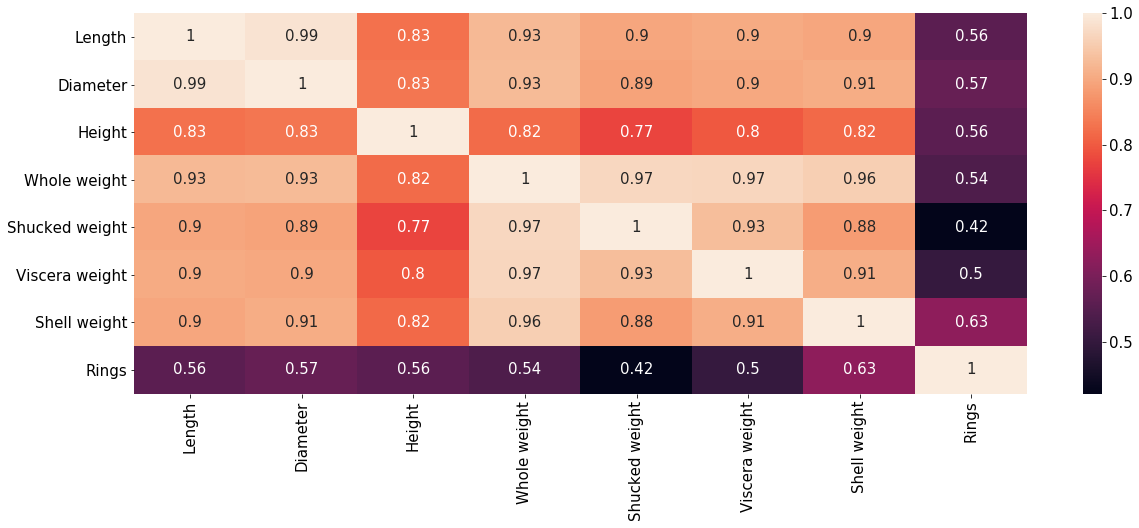

In [166]:
# heatMap(data, False)
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True);

In [167]:
data.corr()['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

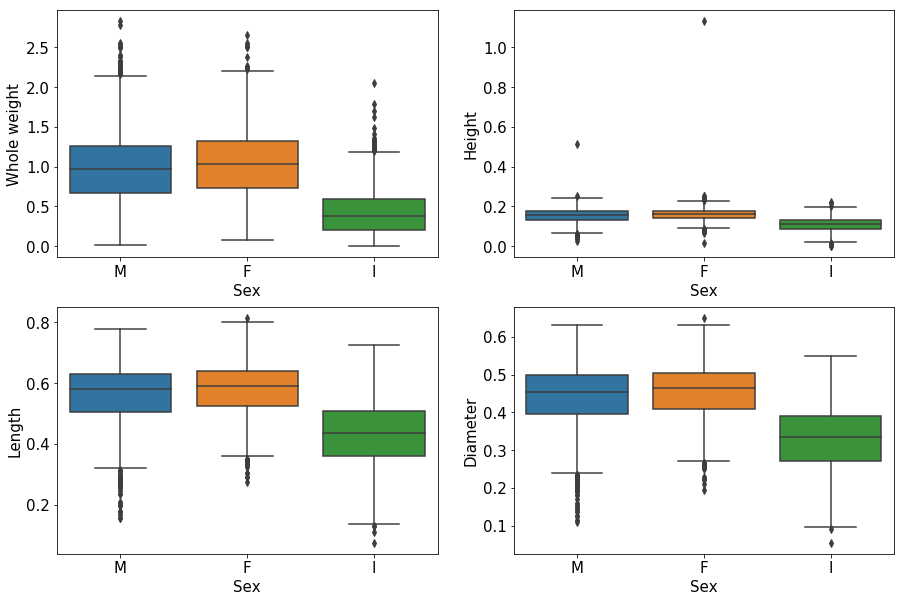

In [168]:
f, axes = plt.subplots(2, 2, figsize=(15, 10)) 
sns.boxplot(x='Sex', y='Whole weight', data=data, ax=axes[0, 0])
sns.boxplot(x='Sex', y='Height', data=data, ax=axes[0, 1])
sns.boxplot(x='Sex', y='Length', data=data, ax=axes[1, 0])
sns.boxplot(x='Sex', y='Diameter', data=data, ax=axes[1, 1]);

In [169]:
data['Meat weight'] = (data['Shucked weight'] + data['Viscera weight'])/ data['Whole weight'] 
data['Meat weight'].mean()

0.6509510708688472

In [170]:
print('Average meat weight of Male abalone:', data[data['Sex'] == 'M']['Meat weight'].mean())
print('Average meat weight of Female abalone:', data[data['Sex'] == 'F']['Meat weight'].mean())
print('Average meat weight of Infant abalone:', data[data['Sex'] == 'I']['Meat weight'].mean())

Average meat weight of Male abalone: 0.6491954294061164
Average meat weight of Female abalone: 0.6446629043143584
Average meat weight of Infant abalone: 0.6590742108403665


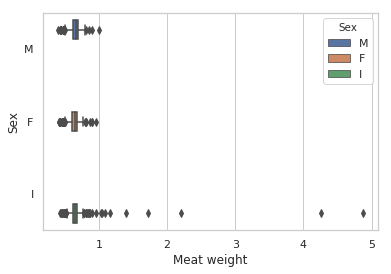

In [221]:
# >>> iris = sns.load_dataset("iris")
# sns.boxplot(data=data.drop(columns='Rings'), orient="h")
# sns.boxplot(x='Sex', y='Meat weight', data=data, orient="h")
# >>> iris = sns.load_dataset("iris")
# >>> ax = sns.boxplot(data=iris, orient="h", palette="Set2")




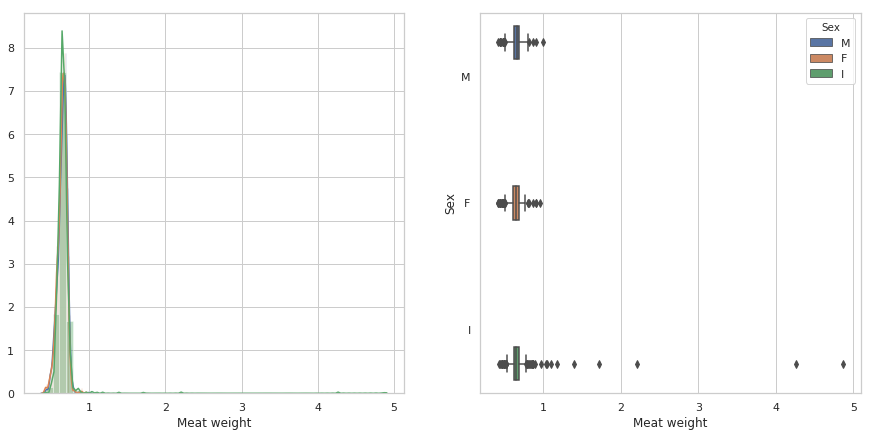

In [222]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
# sns.distplot((data[data['Sex'] == 'M')]['Meat weight'], ax=axes[0])
sns.distplot(data[data['Sex'] == 'M']['Meat weight'], ax=axes[0])
sns.distplot(data[data['Sex'] == 'F']['Meat weight'], ax=axes[0])
sns.distplot(data[data['Sex'] == 'I']['Meat weight'], ax=axes[0])
# sns.boxplot(data=data.drop(columns='Rings'), orient="h")
sns.boxplot(x='Meat weight', y='Sex', hue='Sex', data=data, orient="h")

### Age of abalone

In [172]:
data['Rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

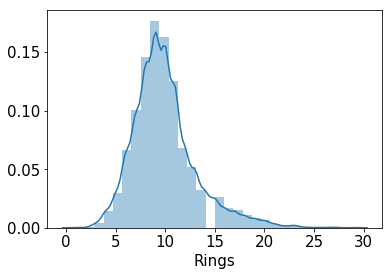

In [173]:
sns.distplot(data['Rings'], bins=30);

Okay, so the age of an abalone is from 1 to 29 years old. Most of the abalone sample is about 10 years old. Let's see if there is anything special about the long-live ones.

In [0]:
IQR = np.quantile(data['Rings'], 0.75) - np.quantile(data['Rings'], 0.25)
old_one = data[data['Rings'] >= (np.quantile(data['Rings'], 0.75) + 1.5 * IQR)]
young_one = data[data['Rings'] < (np.quantile(data['Rings'], 0.75) + 1.5 * IQR)]

In [175]:
print('Number of old one:', old_one.shape[0])
print('Old one age:', (np.quantile(data['Rings'], 0.75) + 1.5 * IQR))
print('Number of young one:', young_one.shape[0])

Number of old one: 261
Old one age: 15.5
Number of young one: 3916


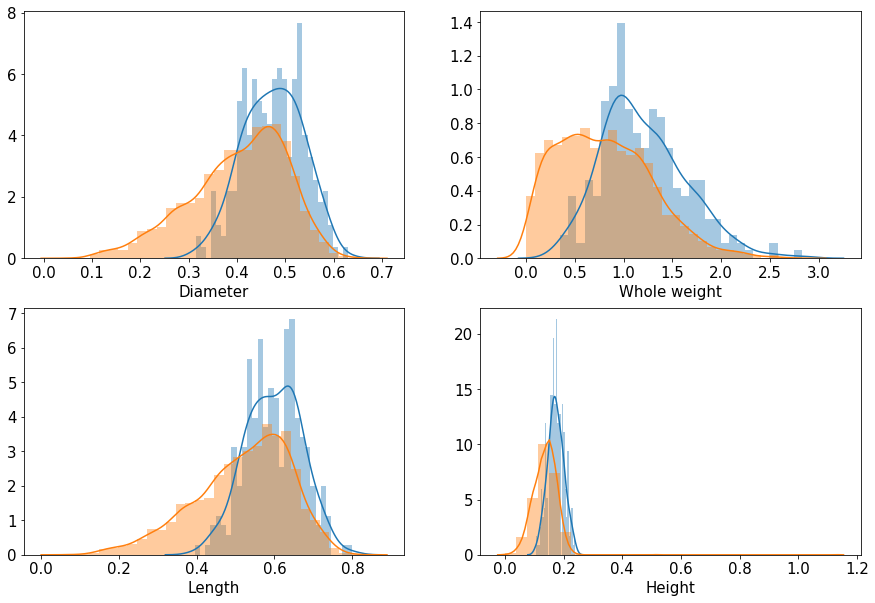

In [176]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(old_one['Length'], bins=30, label='test_label1', ax=axes[1, 0])
sns.distplot(young_one['Length'], bins=30, label='test_label1', ax=axes[1, 0])
sns.distplot(old_one['Whole weight'], bins=30, label='test_label1', ax=axes[0, 1])
sns.distplot(young_one['Whole weight'], bins=30, label='test_label1', ax=axes[0, 1])
sns.distplot(old_one['Diameter'], bins=30, label='test_label1', ax=axes[0, 0])
sns.distplot(young_one['Diameter'], bins=30, label='test_label1', ax=axes[0, 0])
sns.distplot(old_one['Height'], bins=30, label='test_label1', ax=axes[1, 1])
sns.distplot(young_one['Height'], bins=30, label='test_label1', ax=axes[1, 1]);

When consider only the old abalones, the chart demonstrates that with these long-lived abalones are usually the ones with bigger size. Perhaps when talking about, bigger does matter

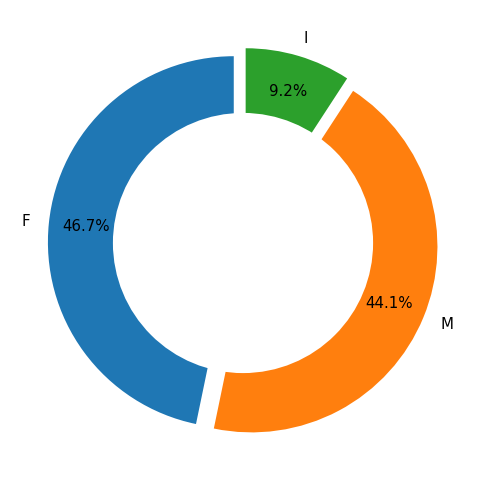

In [177]:
labels = old_one['Sex'].value_counts().index
sizes = old_one['Sex'].value_counts().values

import matplotlib
font = {'weight': 'normal',
        'size': 15}

matplotlib.rc('font', **font)
#explsion
explode = (0.05,0.05,0.05)
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.80, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Data cleaning

## Drop exception values

In [0]:
#Drop Height non-positive values:
data = data[data['Height'] > 0]

## Drop outliers:

In [0]:
#Drop rows with 'Height' > upper bound
data = data[data['Height'] <= height_upper_bound]

In [0]:
#Drop outlier, Don't run this cell twice:
data.drop(index=1174, inplace=True)

# Summary

After doing some analysis
- The size of the abalone is directly proportional to the age of the abalone
- The size and weight features have extremely high correlation, even linear
- The Infant abalone is generally, smaller, lighter and younger than Male and Female. 

# References

Abalone Data Set - UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets/Abalone  
Multicollinearity in Regression Analysis: Problems, Detection, and Solutions - https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/